In [128]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
df= pd.read_csv("C:/Users/nakul/OneDrive/Desktop/Engineering_graduate_salary.csv")

df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,22-10-1990,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,15-05-1990,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,21-08-1989,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,04-05-1991,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,30-10-1990,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [102]:
df.columns


Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [103]:
df= df.drop(['ID','DOB','CollegeID', '12graduation', 'GraduationYear', '12board', '10board','CollegeCityTier',
       'CollegeState'],axis=1)
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,650,665,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,6624,440,435,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,485,475,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,8195,675,620,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,4889,575,495,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [104]:
df.duplicated().sum()

0

In [105]:
df.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [106]:
specialization= df.Specialization.value_counts()
lessthan10= specialization[specialization<=10]
def correctSpecialization(val):
    if val in lessthan10:
        return 'Others'
    else:
        return val
df['Specialization']=df['Specialization'].apply(correctSpecialization)
df['Specialization'].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
Others                                          76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: Specialization, dtype: int64

In [107]:
df.describe()

,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityID,English,Logical,Quant,Domain,ComputerProgramming,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,74.341061,1.924616,71.509857,5210.210807,501.066378,500.431621,514.137759,0.508458,351.868579,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,11.120299,0.264053,8.122462,4776.609877,105.304512,87.299850,122.194955,0.463373,204.526227,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,40.000000,1.000000,6.630000,2.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,66.000000,2.000000,66.530000,526.250000,425.000000,441.250000,430.000000,0.342315,295.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,74.000000,2.000000,71.800000,4027.500000,500.000000,505.000000,515.000000,0.622643,415.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,82.600000,2.000000,76.300000,8822.250000,570.000000,565.000000,595.000000,0.835612,495.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,2.000000,99.930000,18409.000000,875.000000,795.000000,900.000000,0.999910,804.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


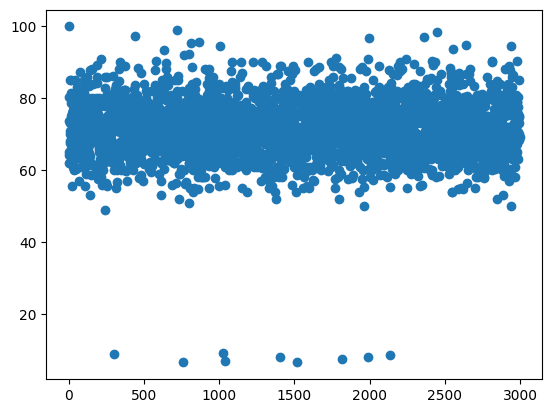

In [108]:
plt.scatter(df.index,df['collegeGPA'])

In [109]:
df=df[(df['collegeGPA']>40)]

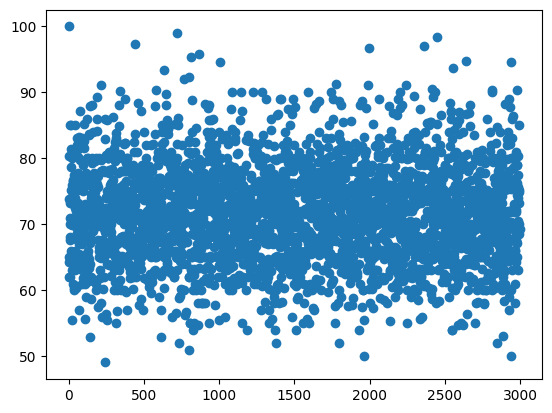

In [110]:
plt.scatter(df.index, df['collegeGPA'])

<function matplotlib.pyplot.show(close=None, block=None)>

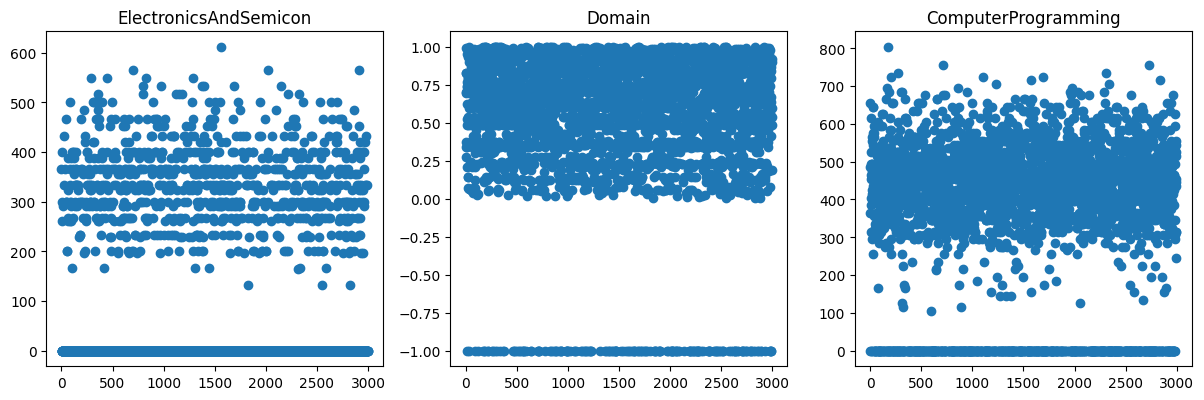

In [111]:
plt.figure(figsize= (20,20))

plt.subplot(4,4,1)
plt.scatter(df.index, df.ElectronicsAndSemicon)
plt.title('ElectronicsAndSemicon')

plt.subplot(4,4,2)
plt.scatter(df.index,df.Domain)
plt.title('Domain')

plt.subplot(4,4,3)
plt.scatter(df.index,df.ComputerProgramming)
plt.title('ComputerProgramming')

plt.show

In [112]:
df=df.replace(-1,np.nan)
cols_with_nan= [col for col in df.columns if df.isna().sum() [col]>0]
for col in cols_with_nan:
    df[col]= df[col].fillna(df[col].mean())

<function matplotlib.pyplot.show(close=None, block=None)>

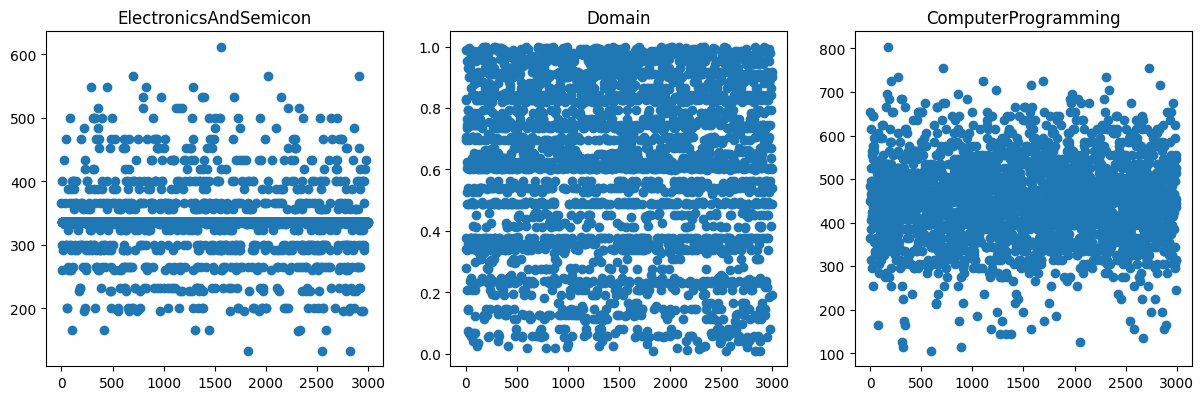

In [113]:
plt.figure(figsize= (20,20))

plt.subplot(4,4,1)
plt.scatter(df.index, df.ElectronicsAndSemicon)
plt.title('ElectronicsAndSemicon')

plt.subplot(4,4,2)
plt.scatter(df.index,df.Domain)
plt.title('Domain')

plt.subplot(4,4,3)
plt.scatter(df.index,df.ComputerProgramming)
plt.title('ComputerProgramming')

plt.show

<AxesSubplot:xlabel='Gender', ylabel='count'>

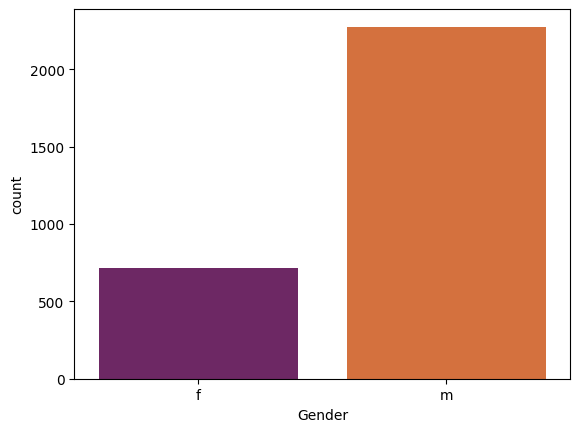

In [114]:
sns.countplot(x= df.Gender,palette = 'inferno')

<AxesSubplot:xlabel='10percentage', ylabel='12percentage'>

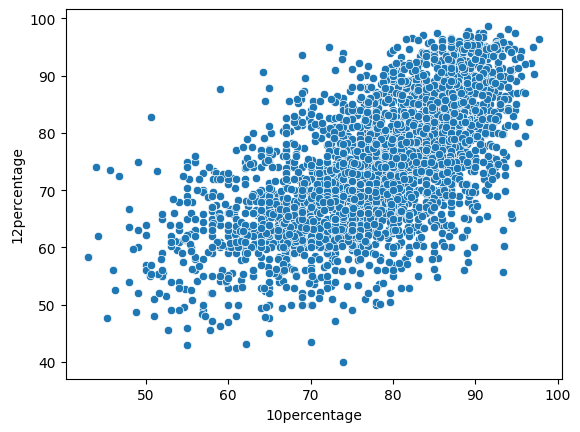

In [120]:
sns.scatterplot(x=df['10percentage'],y= df['12percentage'])

<AxesSubplot:xlabel='collegeGPA', ylabel='Salary'>

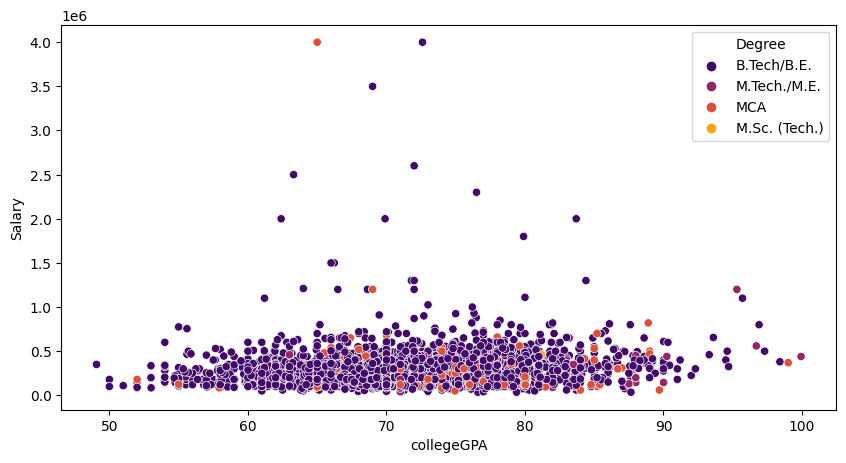

In [122]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= df.collegeGPA,y=df.Salary, hue=df.Degree, palette= 'inferno')

<AxesSubplot:xlabel='openess_to_experience', ylabel='Salary'>

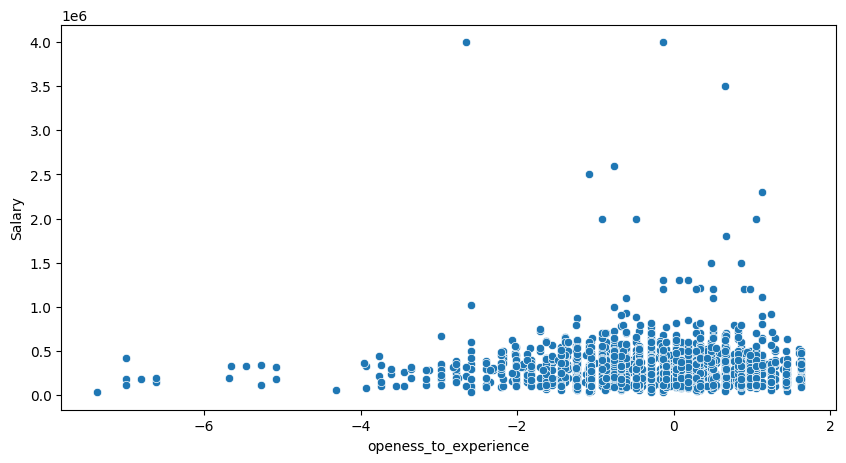

In [124]:
plt.figure(figsize= (10,5))
sns.scatterplot(x= df.openess_to_experience,y= df.Salary)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2989 entries, 0 to 2997
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2989 non-null   object 
 1   10percentage           2989 non-null   float64
 2   12percentage           2989 non-null   float64
 3   CollegeTier            2989 non-null   int64  
 4   Degree                 2989 non-null   object 
 5   Specialization         2989 non-null   object 
 6   collegeGPA             2989 non-null   float64
 7   CollegeCityID          2989 non-null   int64  
 8   English                2989 non-null   int64  
 9   Logical                2989 non-null   int64  
 10  Quant                  2989 non-null   int64  
 11  Domain                 2989 non-null   float64
 12  ComputerProgramming    2989 non-null   float64
 13  ElectronicsAndSemicon  2989 non-null   float64
 14  ComputerScience        2989 non-null   float64
 15  Mech